In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import boxcox
from sklearn.cluster import KMeans
from prettytable import PrettyTable
from scipy.stats import pointbiserialr
from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [4]:
raw_df = pd.read_csv('./Data/full_name_all_feature_with_label.csv')
raw_df

,name,deliver_time,discount,deliver_way,category,sub_category,maker,price,profit,sell_count,profit_money,main_user,area_div,province_div,city_div,label
0,"Fiskars 剪刀, 蓝色",3.727273,0.145455,3.363636,1,1,1,108.056999,-0.094545,4.454545,-21.090909,100,0.122449,0.183673,0.224490,0
1,"GlobeWeis 搭扣信封, 红色",4.250000,0.000000,3.500000,1,2,2,62.604167,0.340000,2.750000,58.750000,100,0.272727,0.363636,0.363636,1
2,"Cardinal 孔加固材料, 回收",4.000000,0.166667,3.500000,1,3,3,26.611508,0.334167,4.333333,36.416667,101,0.076923,0.173077,0.230769,1
3,"Kleencut 开信刀, 工业",2.250000,0.300000,2.500000,1,1,4,133.750000,0.027500,2.750000,34.750000,1,0.363636,0.363636,0.363636,1
4,"KitchenAid 搅拌机, 黑色",2.571429,0.114286,2.714286,1,4,5,458.603175,0.285714,3.428571,497.857143,101,0.166667,0.250000,0.291667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,"Barricks 会议桌, 组装",5.000000,0.600000,3.000000,3,17,65,4240.000000,-0.350000,4.000000,-2374.000000,100,0.250000,0.250000,0.250000,0
1949,"SanDisk 令, 回收",5.000000,0.000000,4.000000,1,7,14,138.555556,0.110000,9.000000,136.000000,100,0.111111,0.111111,0.111111,1
1950,"Chromcraft 圆桌, 长方形",4.000000,0.250000,3.000000,3,17,64,2168.333333,-0.150000,4.000000,-954.000000,1,0.250000,0.250000,0.250000,0
1951,"Kleencut 大剪刀, 工业",4.000000,0.000000,4.000000,1,1,4,226.000000,0.000000,2.000000,0.000000,1,0.500000,0.500000,0.500000,0


In [10]:
def get_df(raw_df):
    num_df = {}
    not_used = ['name','profit','sell_count','profit_money','label']
    for key in raw_df.keys():
        if key not in not_used:
            num_df[key] = []
    for i in range(len(raw_df['name'])):
        num_df['maker'].append(raw_df['maker'][i])
        num_df['deliver_time'].append(raw_df['deliver_time'][i])
        num_df['deliver_way'].append(raw_df['deliver_way'][i])
        num_df['discount'].append(raw_df['discount'][i])
        num_df['category'].append(raw_df['category'][i])
        num_df['sub_category'].append(raw_df['sub_category'][i])
        num_df['price'].append(raw_df['price'][i])
        num_df['main_user'].append(raw_df['main_user'][i])
        num_df['area_div'].append(raw_df['area_div'][i])
        num_df['province_div'].append(raw_df['province_div'][i])
        num_df['city_div'].append(raw_df['city_div'][i])
    return num_df

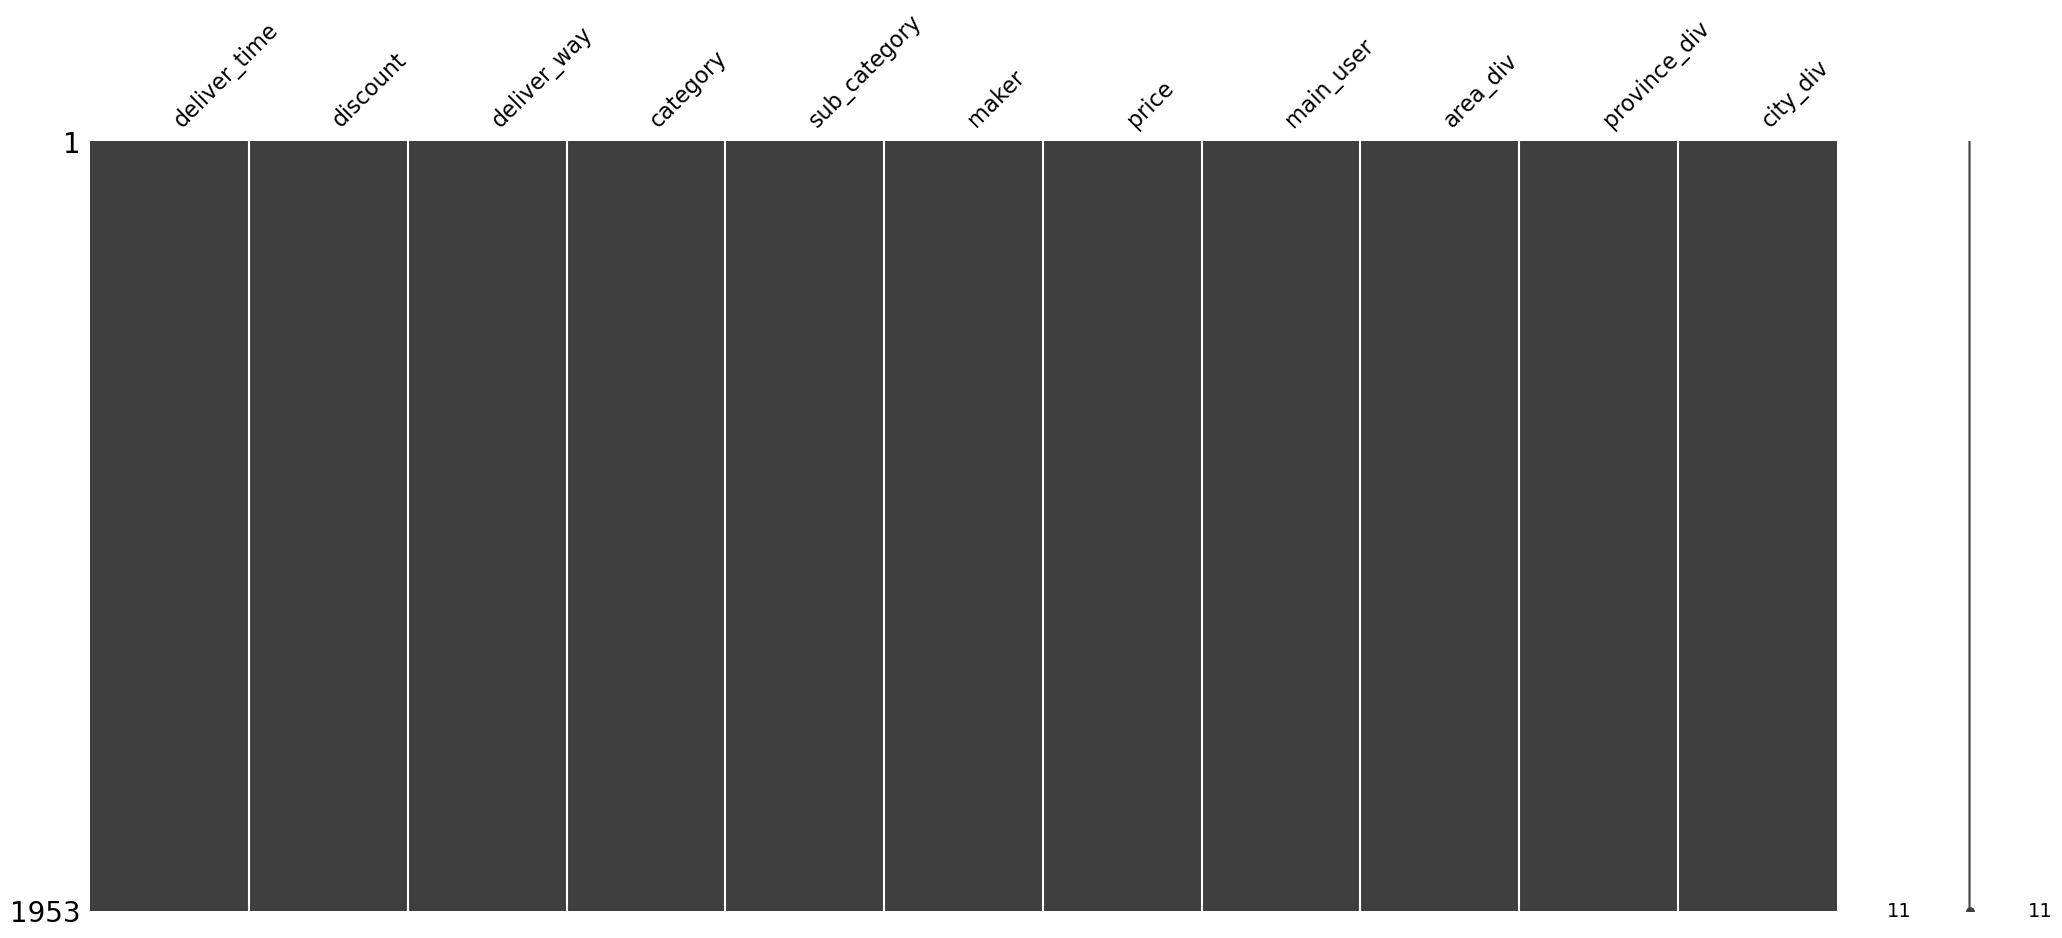

In [93]:
# 缺失值矩阵
df = pd.DataFrame(data=get_df(raw_df))
msno.matrix(df)
plt.show()

/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

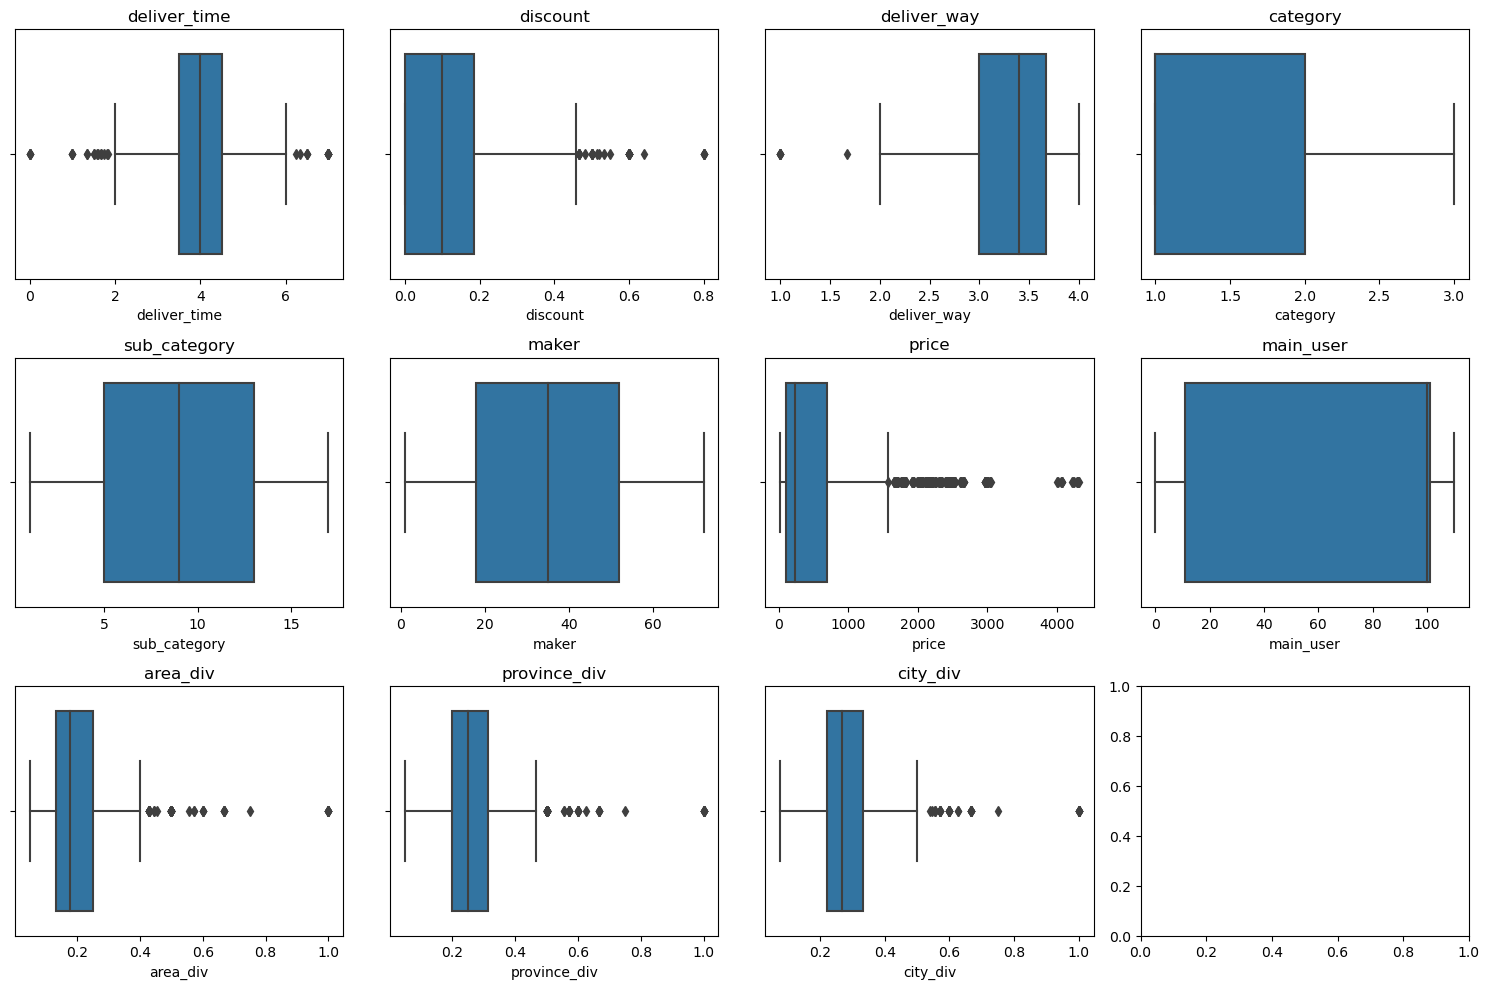

In [12]:
# 绘制特征箱线图
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(column)

plt.tight_layout()
plt.show()

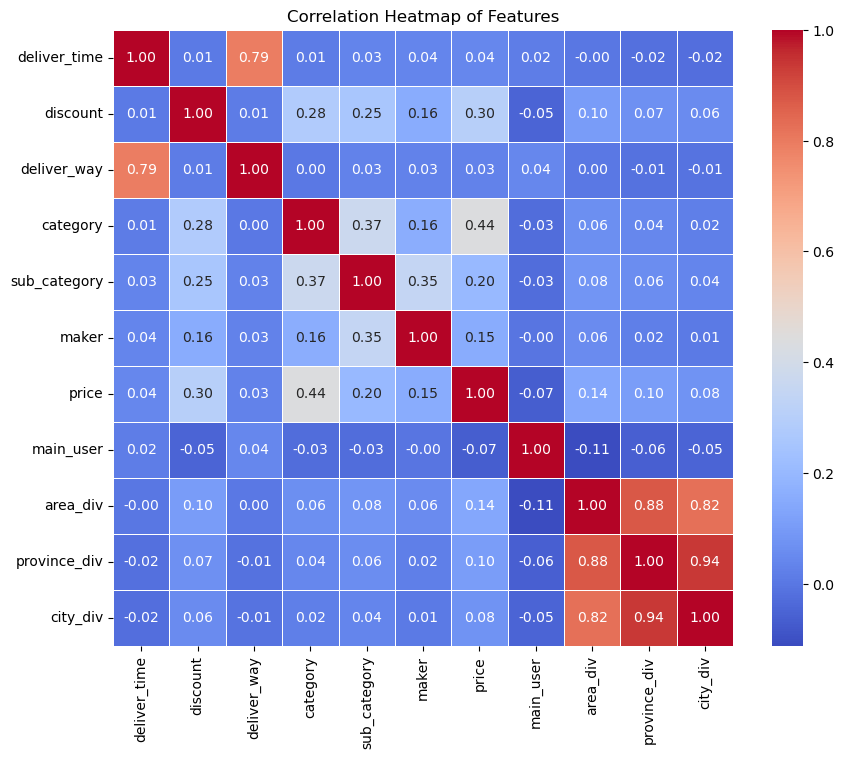

In [13]:
# 热度图绘制，寻找高度相关的特征
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

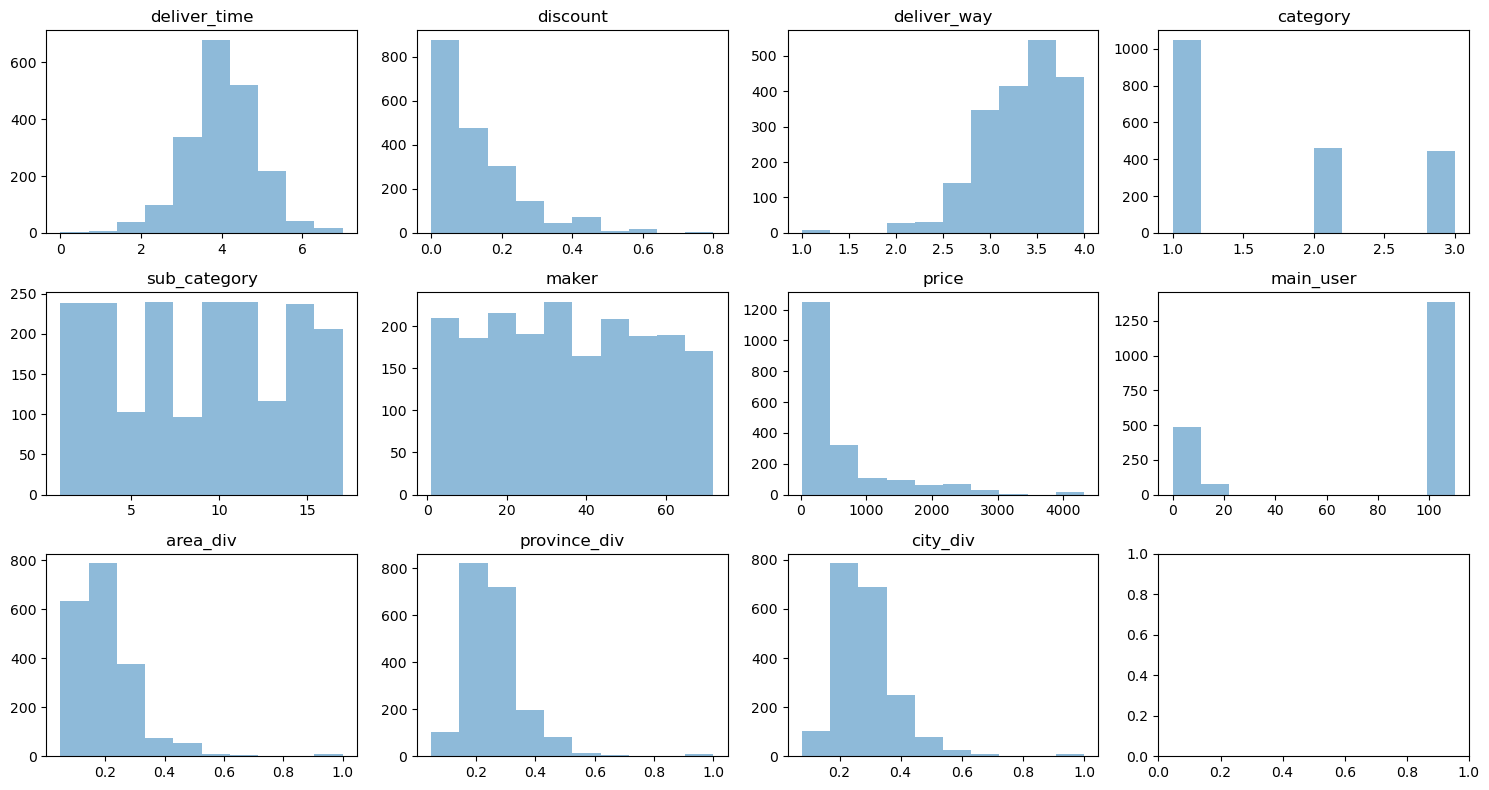

In [15]:
# 绘制特征分布图
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

for i, column in enumerate(df.columns):
    row, col = divmod(i, 4)
    axes[row, col].hist(df[column], bins=10, alpha=0.5)
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [71]:
boundary={}
cluster_table=PrettyTable()
labels=["parameter", "total"]
cluster_table.field_names = labels
param_distribute_list = ['price','discount','area_div','province_div','city_div','deliver_time','deliver_way']
kmeans_result = {'3':[],'4':[],'5':[],'6':[],'7':[],'8':[]}
score = {'price':{'n_cluster=3':0,'n_cluster=4':0,'n_cluster=5':0,'n_cluster=6':0,'n_cluster=7':0,'n_cluster=8':0},
         'discount':{'n_cluster=3':0,'n_cluster=4':0,'n_cluster=5':0,'n_cluster=6':0,'n_cluster=7':0,'n_cluster=8':0},
         'deliver_time':{'n_cluster=3':0,'n_cluster=4':0,'n_cluster=5':0,'n_cluster=6':0,'n_cluster=7':0,'n_cluster=8':0},
         'deliver_way':{'n_cluster=3':0,'n_cluster=4':0,'n_cluster=5':0,'n_cluster=6':0,'n_cluster=7':0,'n_cluster=8':0},
         'area_div':{'n_cluster=3':0,'n_cluster=4':0,'n_cluster=5':0,'n_cluster=6':0,'n_cluster=7':0,'n_cluster=8':0},
         'province_div':{'n_cluster=3':0,'n_cluster=4':0,'n_cluster=5':0,'n_cluster=6':0,'n_cluster=7':0,'n_cluster=8':0},
         'city_div':{'n_cluster=3':0,'n_cluster=4':0,'n_cluster=5':0,'n_cluster=6':0,'n_cluster=7':0,'n_cluster=8':0}
        }

/Users/suzyyy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

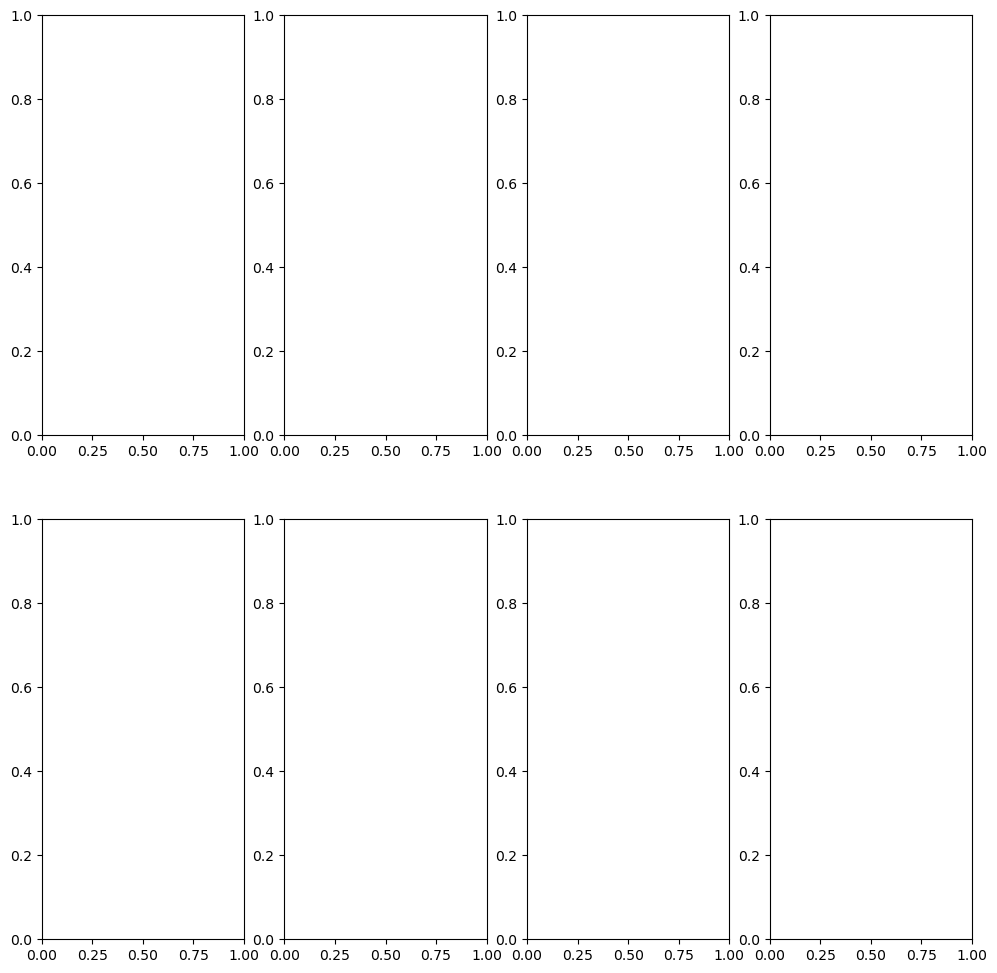

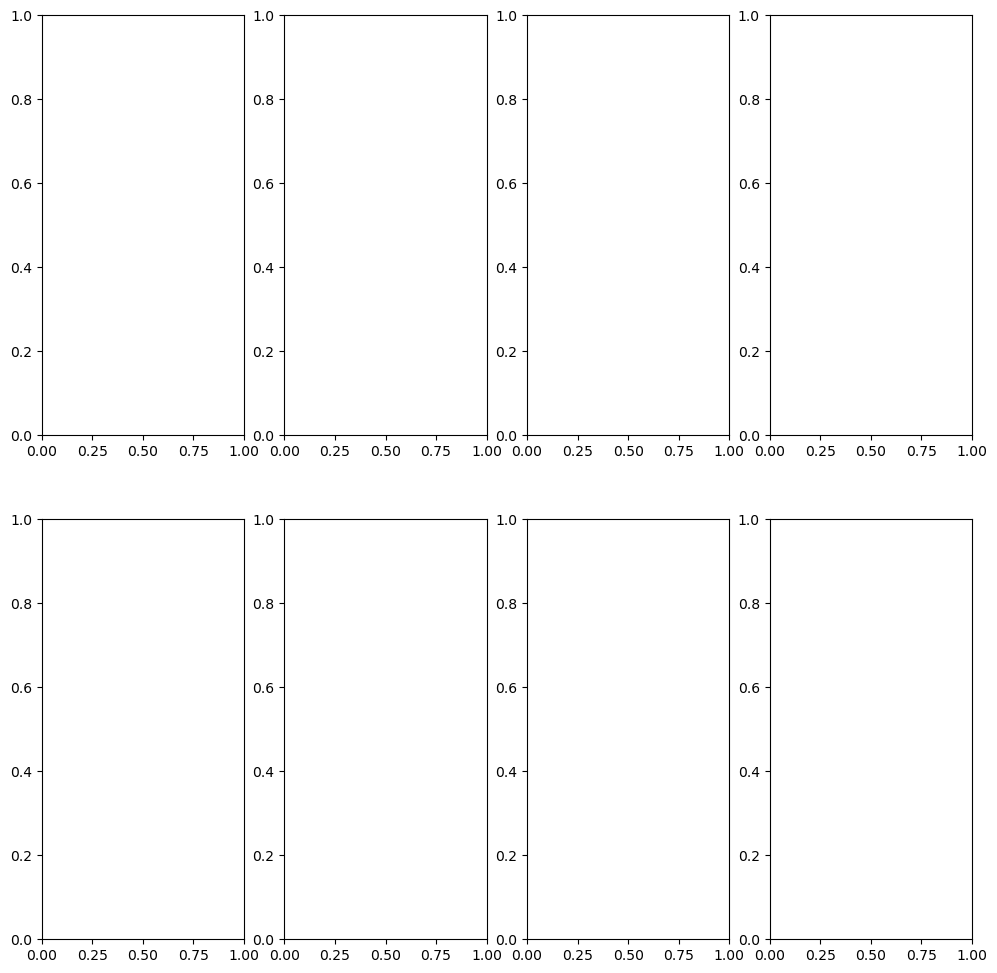

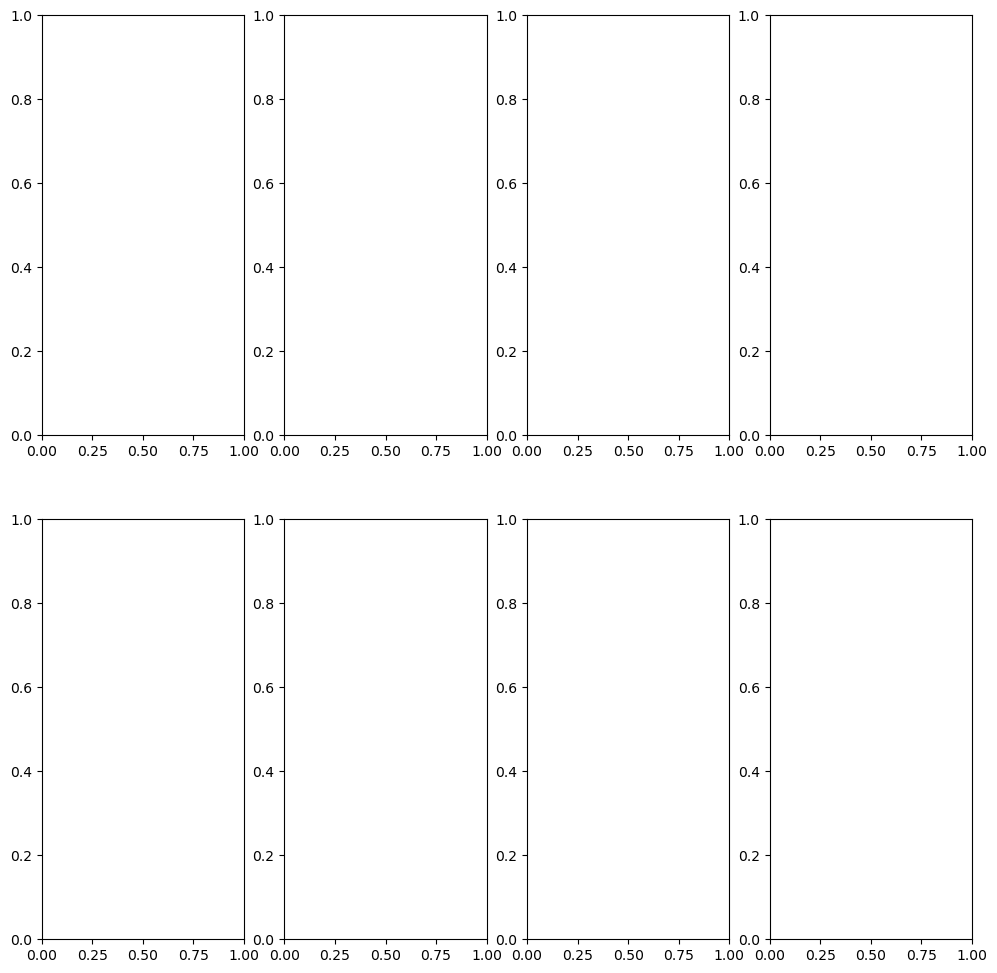

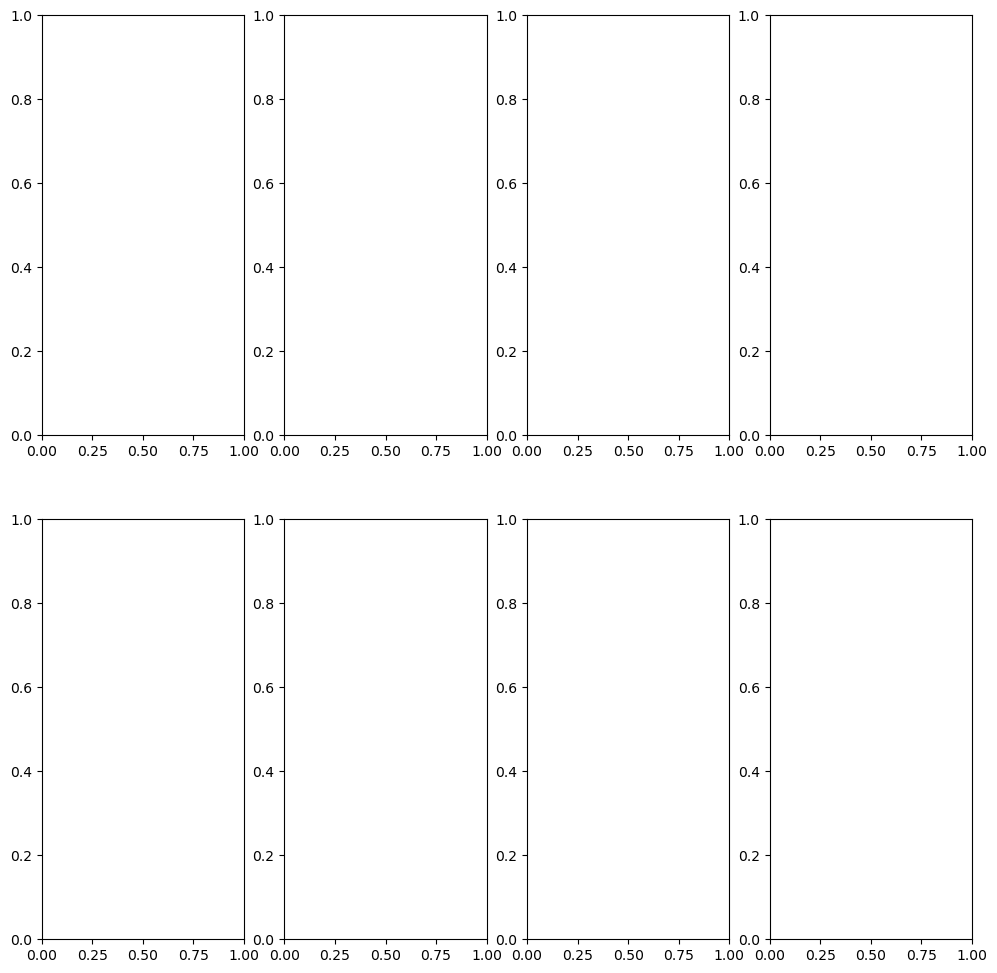

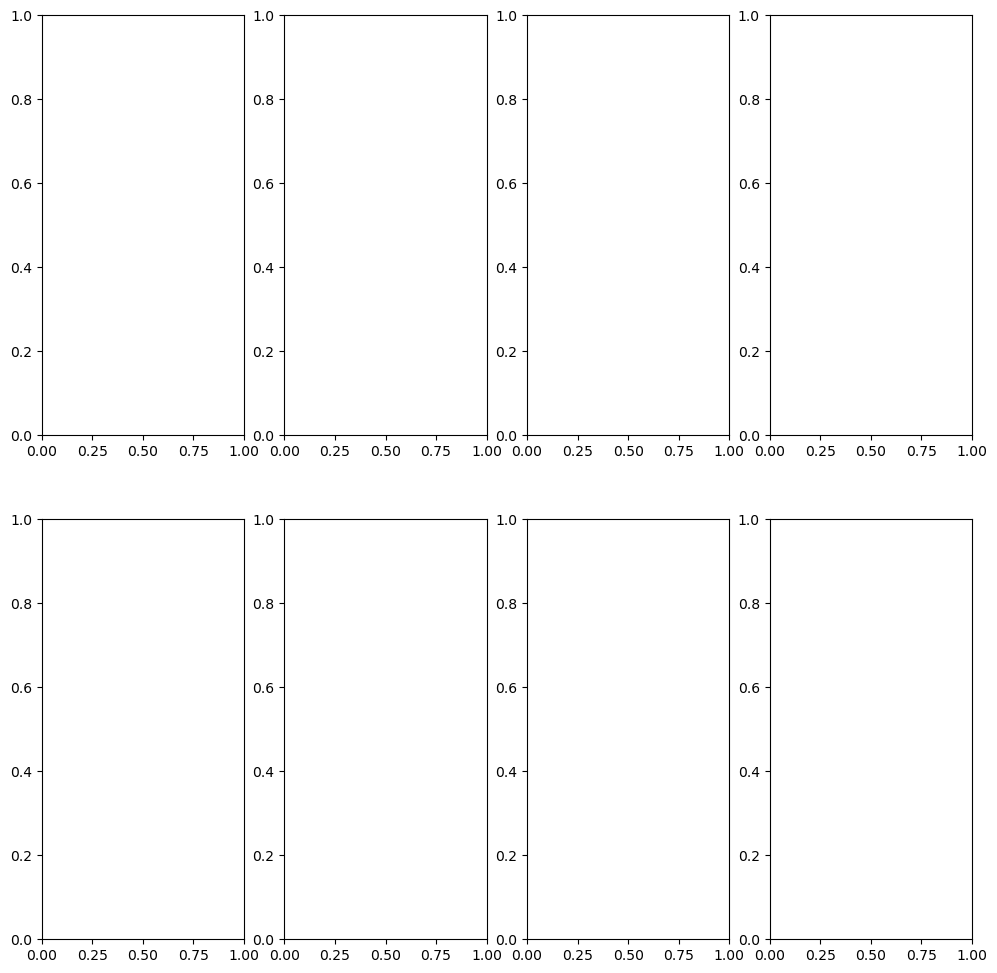

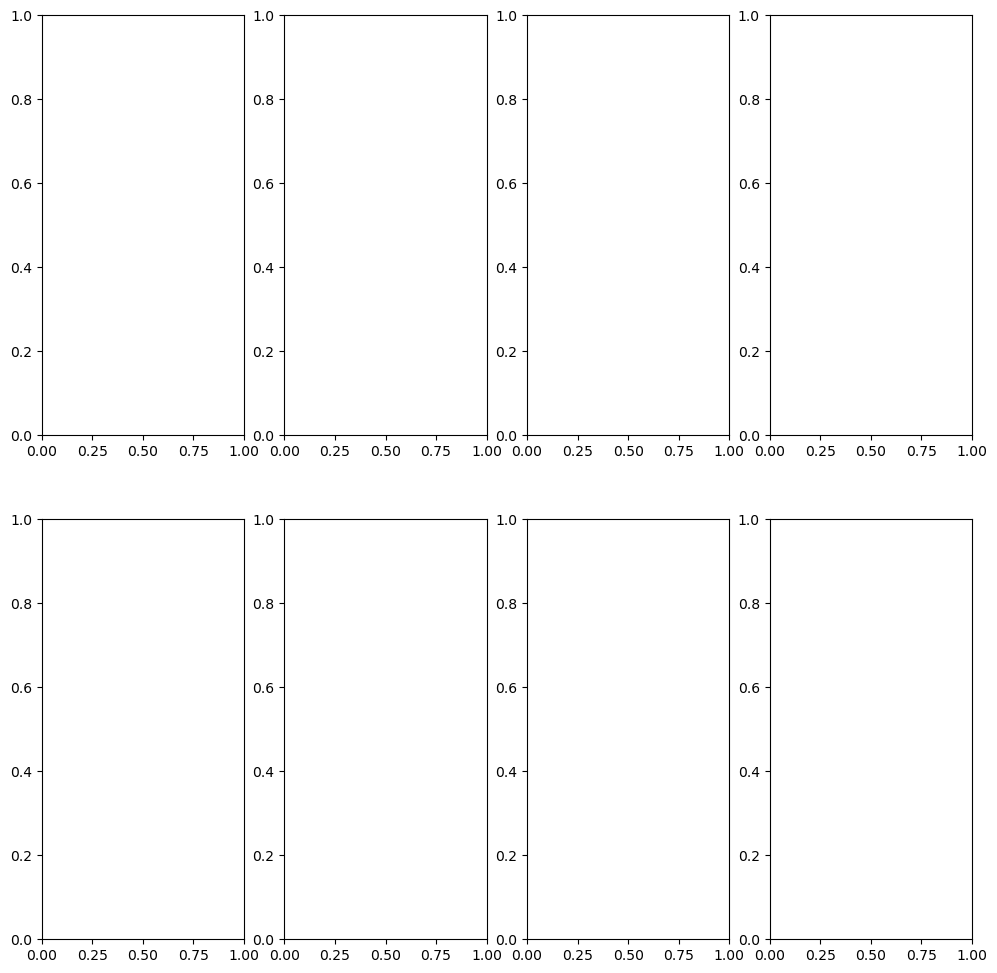

In [72]:
for n in range(3,9,1):
    n_clusters= n
    labels.extend([i for i in range(n_clusters)])

    fig,axs=plt.subplots(nrows=2,ncols=4,figsize=(12,12))

    for i in range(7):
        row=i//4
        col=i%4
        ax=axs[row][col]
        param=param_distribute_list[i]
        temp=np.array(df[param].values.reshape(-1, 1)).reshape(-1,1)
        kmeans=KMeans(n_clusters=n_clusters).fit(temp)
        result=kmeans.predict(temp)
        kmeans_result[str(n)].append(result)
        silhouette_avg = silhouette_score(temp, result)
        score[param]['n_cluster='+str(n)] = silhouette_avg
        counts=np.bincount(kmeans.labels_) 
        centers=kmeans.cluster_centers_
        boundary[param]=[item[0] for item in centers]
        boundary[param].sort()
        total=sum(counts)
        row=[param,total]

/Users/suzyyy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

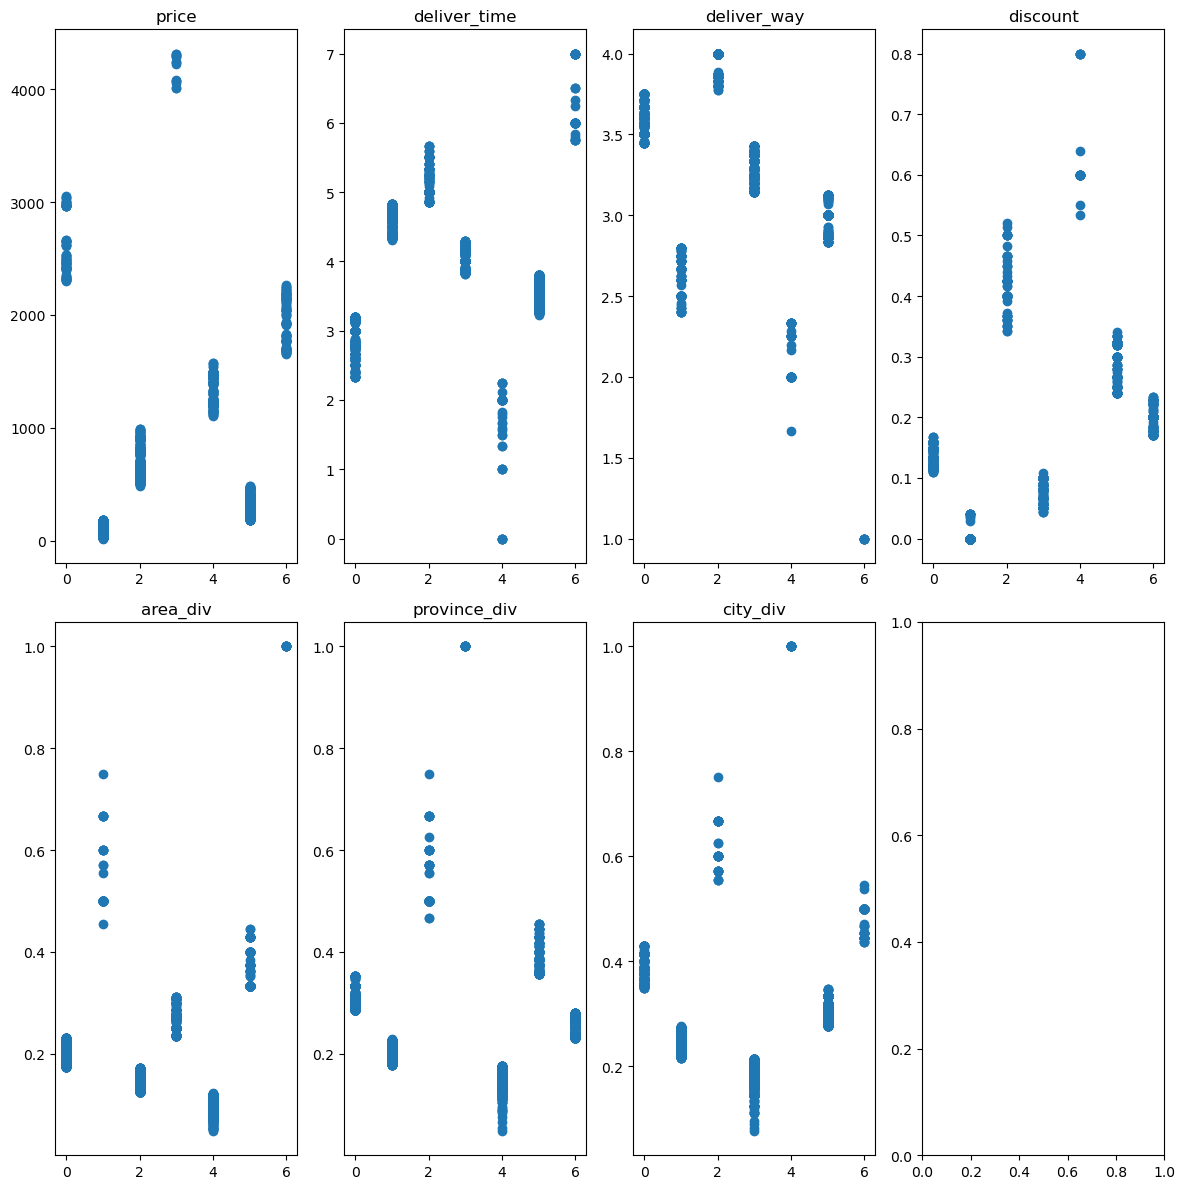

In [82]:
# 离散化
n_clusters=7
labels.extend([i for i in range(n_clusters)])
boundary={}
cluster_table=PrettyTable()
labels=["parameter", "total"]
cluster_table.field_names = labels
param_distribute_list = ['price','deliver_time','deliver_way','discount','area_div','province_div','city_div',]

fig,axs=plt.subplots(nrows=2,ncols=4,figsize=(12,12))

for i in range(7):
    row=i//4
    col=i%4
    ax=axs[row][col]
    param=param_distribute_list[i]
    temp=np.array(df[param].values.reshape(-1, 1)).reshape(-1,1)
    kmeans=KMeans(n_clusters=n_clusters).fit(temp)
    result=kmeans.predict(temp)
    #kmeans_result_5.append(result)
    #silhouette_avg = silhouette_score(temp, result)
    #score[param]['n_cluster=7'] = silhouette_avg
    counts=np.bincount(kmeans.labels_) 
    centers=kmeans.cluster_centers_
    boundary[param]=[item[0] for item in centers]
    boundary[param].sort()
    total=sum(counts)
    row=[param,total]
    #for j in range(len(counts)):
    #    row.append('{}({}%)'.format(centers[j],round(counts[j]/total*100,1)))
    #cluster_table.add_row(row)
    ax.scatter(result,temp)
    ax.set_title(param)
plt.tight_layout()
plt.show()

#print(cluster_table)

In [73]:
pd.DataFrame(data=score) 5 8 7 8 3 3 3

,price,discount,deliver_time,deliver_way,area_div,province_div,city_div
n_cluster=3,0.696697,0.667453,0.526819,0.562901,0.608037,0.584800,0.571406
n_cluster=4,0.701638,0.702959,0.532231,0.573382,0.598453,0.558355,0.561673
n_cluster=5,0.717671,0.709462,0.534498,0.587514,0.557087,0.539197,0.544896
n_cluster=6,0.711289,0.714555,0.549612,0.630753,0.551301,0.547965,0.553282
n_cluster=7,0.635957,0.746162,0.561085,0.631965,0.554774,0.547142,0.556667
n_cluster=8,0.640774,0.751928,0.559416,0.653990,0.563283,0.550815,0.565152


In [111]:
# 整理处理结果
param_distribute_list = ['price','discount','area_div','province_div','city_div','deliver_time','deliver_way']
processed_dict = {'maker':[], 'deliver_time':[], 'discount':[], 'category':[], 'sub_category':[],'price':[], 'deliver_way':[],
                  'main_user':[],'area_div':[],'province_div':[],'city_div':[],
                  'profit_money':[],'profit':[]}

processed_dict['price'] = (kmeans_result['5'][0])
#processed_dict['discount'] = (kmeans_result['8'][1])
processed_dict['area_div'] = (kmeans_result['3'][2])
processed_dict['province_div'] = (kmeans_result['3'][3])
processed_dict['city_div'] = (kmeans_result['3'][4])
#processed_dict['deliver_time'] = (kmeans_result['7'][5])
#processed_dict['deliver_way'] = (kmeans_result['8'][6])


for i in range(len(raw_df['name'])):
    processed_dict['maker'].append(raw_df['maker'][i])
    processed_dict['category'].append(raw_df['category'][i])
    processed_dict['sub_category'].append(raw_df['sub_category'][i])
    processed_dict['main_user'].append(raw_df['main_user'][i])
    processed_dict['deliver_way'].append(raw_df['deliver_way'][i])
    processed_dict['deliver_time'].append(raw_df['deliver_time'][i])
    processed_dict['discount'].append(raw_df['discount'][i])
    processed_dict['profit_money'].append(raw_df['profit_money'][i])
    processed_dict['profit'].append(raw_df['profit'][i])

In [113]:
# 检验
table = PrettyTable()
table.field_names = ["Feature", "Spearman Correlation", "P-value"]

label = processed_dict['profit_money']

# 遍历特征列
for feature_name, feature_values in processed_dict.items():
    if feature_name != 'profit_money' and feature_name !='profit':
        correlation, p_value = spearmanr(processed_dict[feature_name], label)
        table.add_row([feature_name, correlation, p_value])

# 打印 PrettyTable
print(table)

+--------------+-----------------------+------------------------+
|   Feature    |  Spearman Correlation |        P-value         |
+--------------+-----------------------+------------------------+
|    maker     | -0.035163505513164134 |  0.12031379343720547   |
| deliver_time |  0.00807688893734393  |   0.7213034487871499   |
|   discount   |  -0.37870351971331345 | 1.2418133079440156e-67 |
|   category   |  0.12914665409612425  | 1.0180490767742052e-08 |
| sub_category |  -0.03589538612983604 |  0.11278205390413215   |
|    price     |  0.15974341849906556  |  1.24194007219561e-12  |
| deliver_way  |  0.02421964863784305  |   0.2847071953148944   |
|  main_user   |  0.009331998232911403 |   0.6802282415662106   |
|   area_div   |  -0.1043363236952381  | 3.8268037248242205e-06 |
| province_div |  -0.09958547561161843 | 1.037995655405463e-05  |
|   city_div   |  0.07951158904679954  | 0.00043619676884367825 |
+--------------+-----------------------+------------------------+


In [114]:
final_dict = {'maker':processed_dict['maker'], 'deliver_way':processed_dict['deliver_way'], 
              'discount':processed_dict['discount'], 'category':processed_dict['category'], 
              'sub_category':processed_dict['sub_category'],'price':processed_dict['price'], 
                'area_div':processed_dict['area_div'],
                  'profit_money':processed_dict['profit_money'],'profit':processed_dict['profit']}

In [115]:
pd.DataFrame(data=final_dict)

,maker,deliver_way,discount,category,sub_category,price,area_div,profit_money,profit
0,1,3.363636,0.145455,1,1,1,0,-21.090909,-0.094545
1,2,3.500000,0.000000,1,2,1,2,58.750000,0.340000
2,3,3.500000,0.166667,1,3,1,0,36.416667,0.334167
3,4,2.500000,0.300000,1,1,1,2,34.750000,0.027500
4,5,2.714286,0.114286,1,4,4,0,497.857143,0.285714
...,...,...,...,...,...,...,...,...,...
1948,65,3.000000,0.600000,3,17,3,2,-2374.000000,-0.350000
1949,14,4.000000,0.000000,1,7,1,0,136.000000,0.110000
1950,64,3.000000,0.250000,3,17,2,2,-954.000000,-0.150000
1951,4,4.000000,0.000000,1,1,1,1,0.000000,0.000000


In [116]:
df = pd.DataFrame(data=processed_dict)
df.to_csv('./Data/processed_full_feature.csv',index=None)

In [117]:
df = pd.DataFrame(data=final_dict)
df.to_csv('./Data/processed_selected_feature.csv',index=None)

In [119]:
df = pd.DataFrame(data=get_df(raw_df))
df['profit_money'] = processed_dict['profit_money']
df['profit'] = processed_dict['profit']
df.to_csv('./Data/raw_full_feature.csv',index=None)